# Support Vector Machine Assignment
 
The given dataset is from Lending Club which connects borrowers with investors. We will use lending data from 2007-2010 and build a classifier model to predict whether or not the borrower has paid back their loan in full.
 
Dataset: loan_data-1.csv   
Here are what the columns represent:
 
1.	credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
2.	purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
3.	int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
4.	installment: The monthly installments owed by the borrower if the loan is funded.
5.	log.annual.inc: The natural log of the self-reported annual income of the borrower.
6.	dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
7.	fico: The FICO credit score of the borrower.
8.	days.with.cr.line: The number of days the borrower has had a credit line.
9.	revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
10.	revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
11.	inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
12.	delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
13.	pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
14.	not.fully.paid: whether or not the borrower paid back their loan in full
 
 
QUESTIONS:
 
1.	Read the dataset (0.25 M)
•	lookout for missing values (0.25 M)
•	Compute statistical summary of dataset (0.5 M)
 
2.	Visualize the feature relationships
•	Pairwise Plot (1 M)
•	Heatmap (1 M)
•	Create a countplot using sns showing the counts of loans by purpose,  with the color hue defined by not.fully.paid. (1M)
 
3.	Split the Data
•	Divide into features and target (0.5 M)
•	Divide into training and testing (0.5 M)
•	Ensure that data is divided with a more or less equal ratio of class 1 and 0 in both test and train set (0.5 M)
 
4.	Implement the SVM Model
•	Scale the features (1 M)
•	Train Model (1 M)
•	Predict (1 M)
 
5.	Measure Accuracy
•	Classification Report (0.5)

## 1.	Read the dataset (0.25 M)
•	lookout for missing values (0.25 M)
•	Compute statistical summary of dataset (0.5 M)


In [1]:
#Making imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy.stats import skew
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Preprocessing Input data
%matplotlib inline
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (12,8)
df = pd.read_csv('loan_data-1.csv')
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [4]:
#Statistical summary of dataset
df.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

In [5]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [6]:
df.shape

(9578, 14)

In [7]:
# Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [8]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [9]:
df['purpose'].describe()

count                   9578
unique                     7
top       debt_consolidation
freq                    3957
Name: purpose, dtype: object

                    credit.policy  int.rate  installment  log.annual.inc  \
purpose                                                                    
all_other                    2331      2331         2331            2331   
credit_card                  1262      1262         1262            1262   
debt_consolidation           3957      3957         3957            3957   
educational                   343       343          343             343   
home_improvement              629       629          629             629   
major_purchase                437       437          437             437   
small_business                619       619          619             619   

                     dti  fico  days.with.cr.line  revol.bal  revol.util  \
purpose                                                                    
all_other           2331  2331               2331       2331        2331   
credit_card         1262  1262               1262       1262        1262   
debt_consol

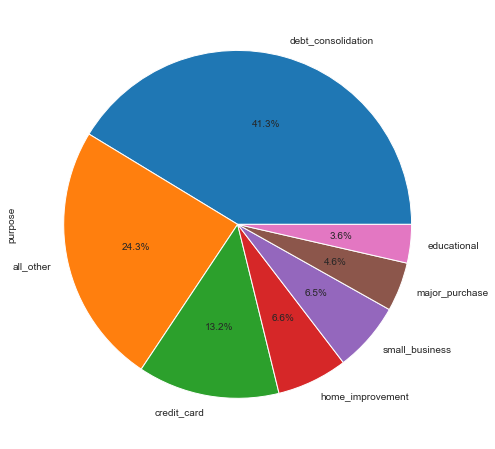

In [10]:
print(df.groupby(['purpose']).count())

#plot the pie chart of purpose data
df.purpose.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.show()

In [11]:
df.describe(include='all')  

credit.policy             purpose     int.rate  installment  \
count     9578.000000                9578  9578.000000  9578.000000   
unique            NaN                   7          NaN          NaN   
top               NaN  debt_consolidation          NaN          NaN   
freq              NaN                3957          NaN          NaN   
mean         0.804970                 NaN     0.122640   319.089413   
std          0.396245                 NaN     0.026847   207.071301   
min          0.000000                 NaN     0.060000    15.670000   
25%          1.000000                 NaN     0.103900   163.770000   
50%          1.000000                 NaN     0.122100   268.950000   
75%          1.000000                 NaN     0.140700   432.762500   
max          1.000000                 NaN     0.216400   940.140000   

        log.annual.inc          dti         fico  days.with.cr.line  \
count      9578.000000  9578.000000  9578.000000        9578.000000   
unique             NaN          NaN          NaN                NaN   
top                NaN          NaN          NaN                NaN   
freq               NaN          NaN          NaN                NaN   
mean         10.932117    12.606679   710.846314        4560.767197   
std           0.614813     6.883970    37.970537        2496.930377   
min           7.547502     0.000000   612.000000         178.958333   
25%          10.558414     7.212500   682.000000        2820.000000   
50%          10.928884    12.665000   707.000000        4139.958333   
75%          11.291293    17.950000   737.000000        5730.000000   
max          14.528354    29.960000   827.000000       17639.958330   

           revol.bal   revol.util  inq.last.6mths  delinq.2yrs      pub.rec  \
count   9.578000e+03  9578.000000     9578.000000  9578.000000  9578.000000   
unique           NaN          NaN             NaN          NaN          NaN   
top              NaN          NaN             NaN          NaN          NaN   
freq             NaN          NaN             NaN          NaN          NaN   
mean    1.691396e+04    46.799236        1.577469     0.163708     0.062122   
std     3.375619e+04    29.014417        2.200245     0.546215     0.262126   
min     0.000000e+00     0.000000        0.000000     0.000000     0.000000   
25%     3.187000e+03    22.600000        0.000000     0.000000     0.000000   
50%     8.596000e+03    46.300000        1.000000     0.000000     0.000000   
75%     1.824950e+04    70.900000        2.000000     0.000000     0.000000   
max     1.207359e+06   119.000000       33.000000    13.000000     5.000000   

        not.fully.paid  
count      9578.000000  
unique             NaN  
top                NaN  
freq               NaN  
mean          0.160054  
std           0.366676  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           0.000000  
max           1.000000

In [12]:
#check for duplicates
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

0


Empty DataFrame
Columns: [credit.policy, purpose, int.rate, installment, log.annual.inc, dti, fico, days.with.cr.line, revol.bal, revol.util, inq.last.6mths, delinq.2yrs, pub.rec, not.fully.paid]
Index: []

## 2.	Visualize the feature relationships
•	Pairwise Plot (1 M)
•	Heatmap (1 M)
•	Create a countplot using sns showing the counts of loans by purpose,  with the color hue defined by not.fully.paid. (1M)

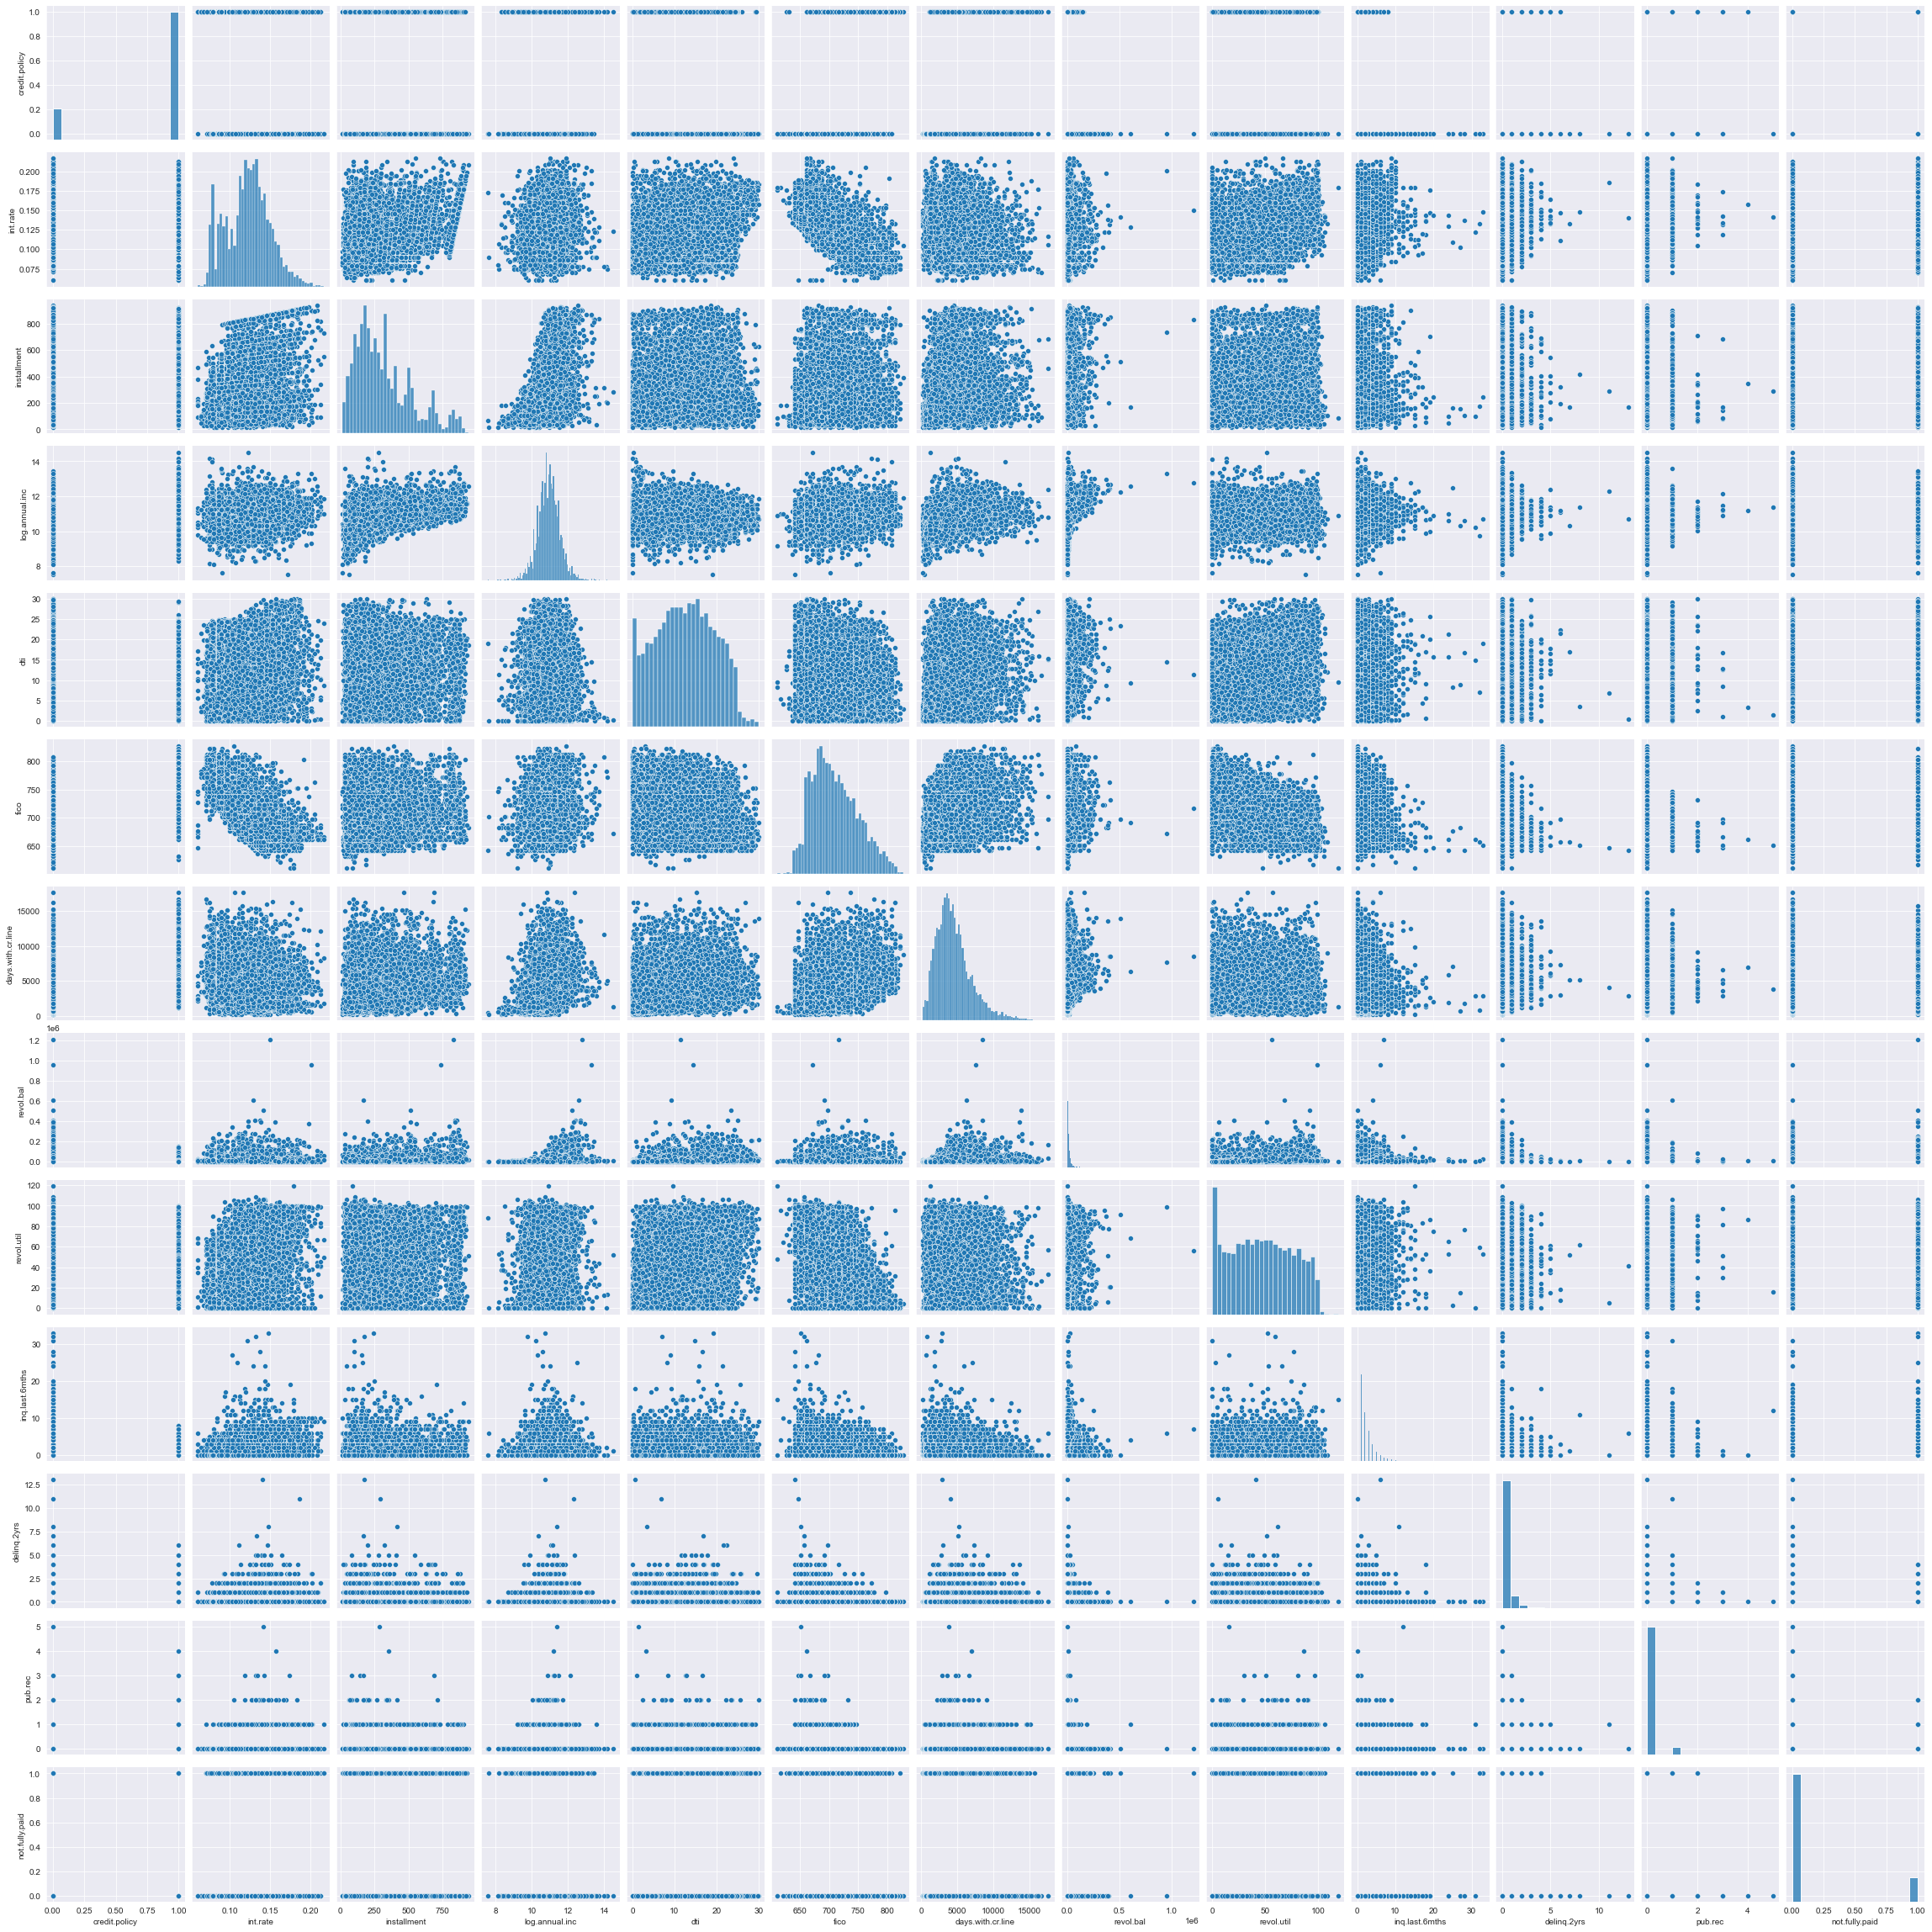

In [13]:
#Pairplot between features
sns.pairplot(df)

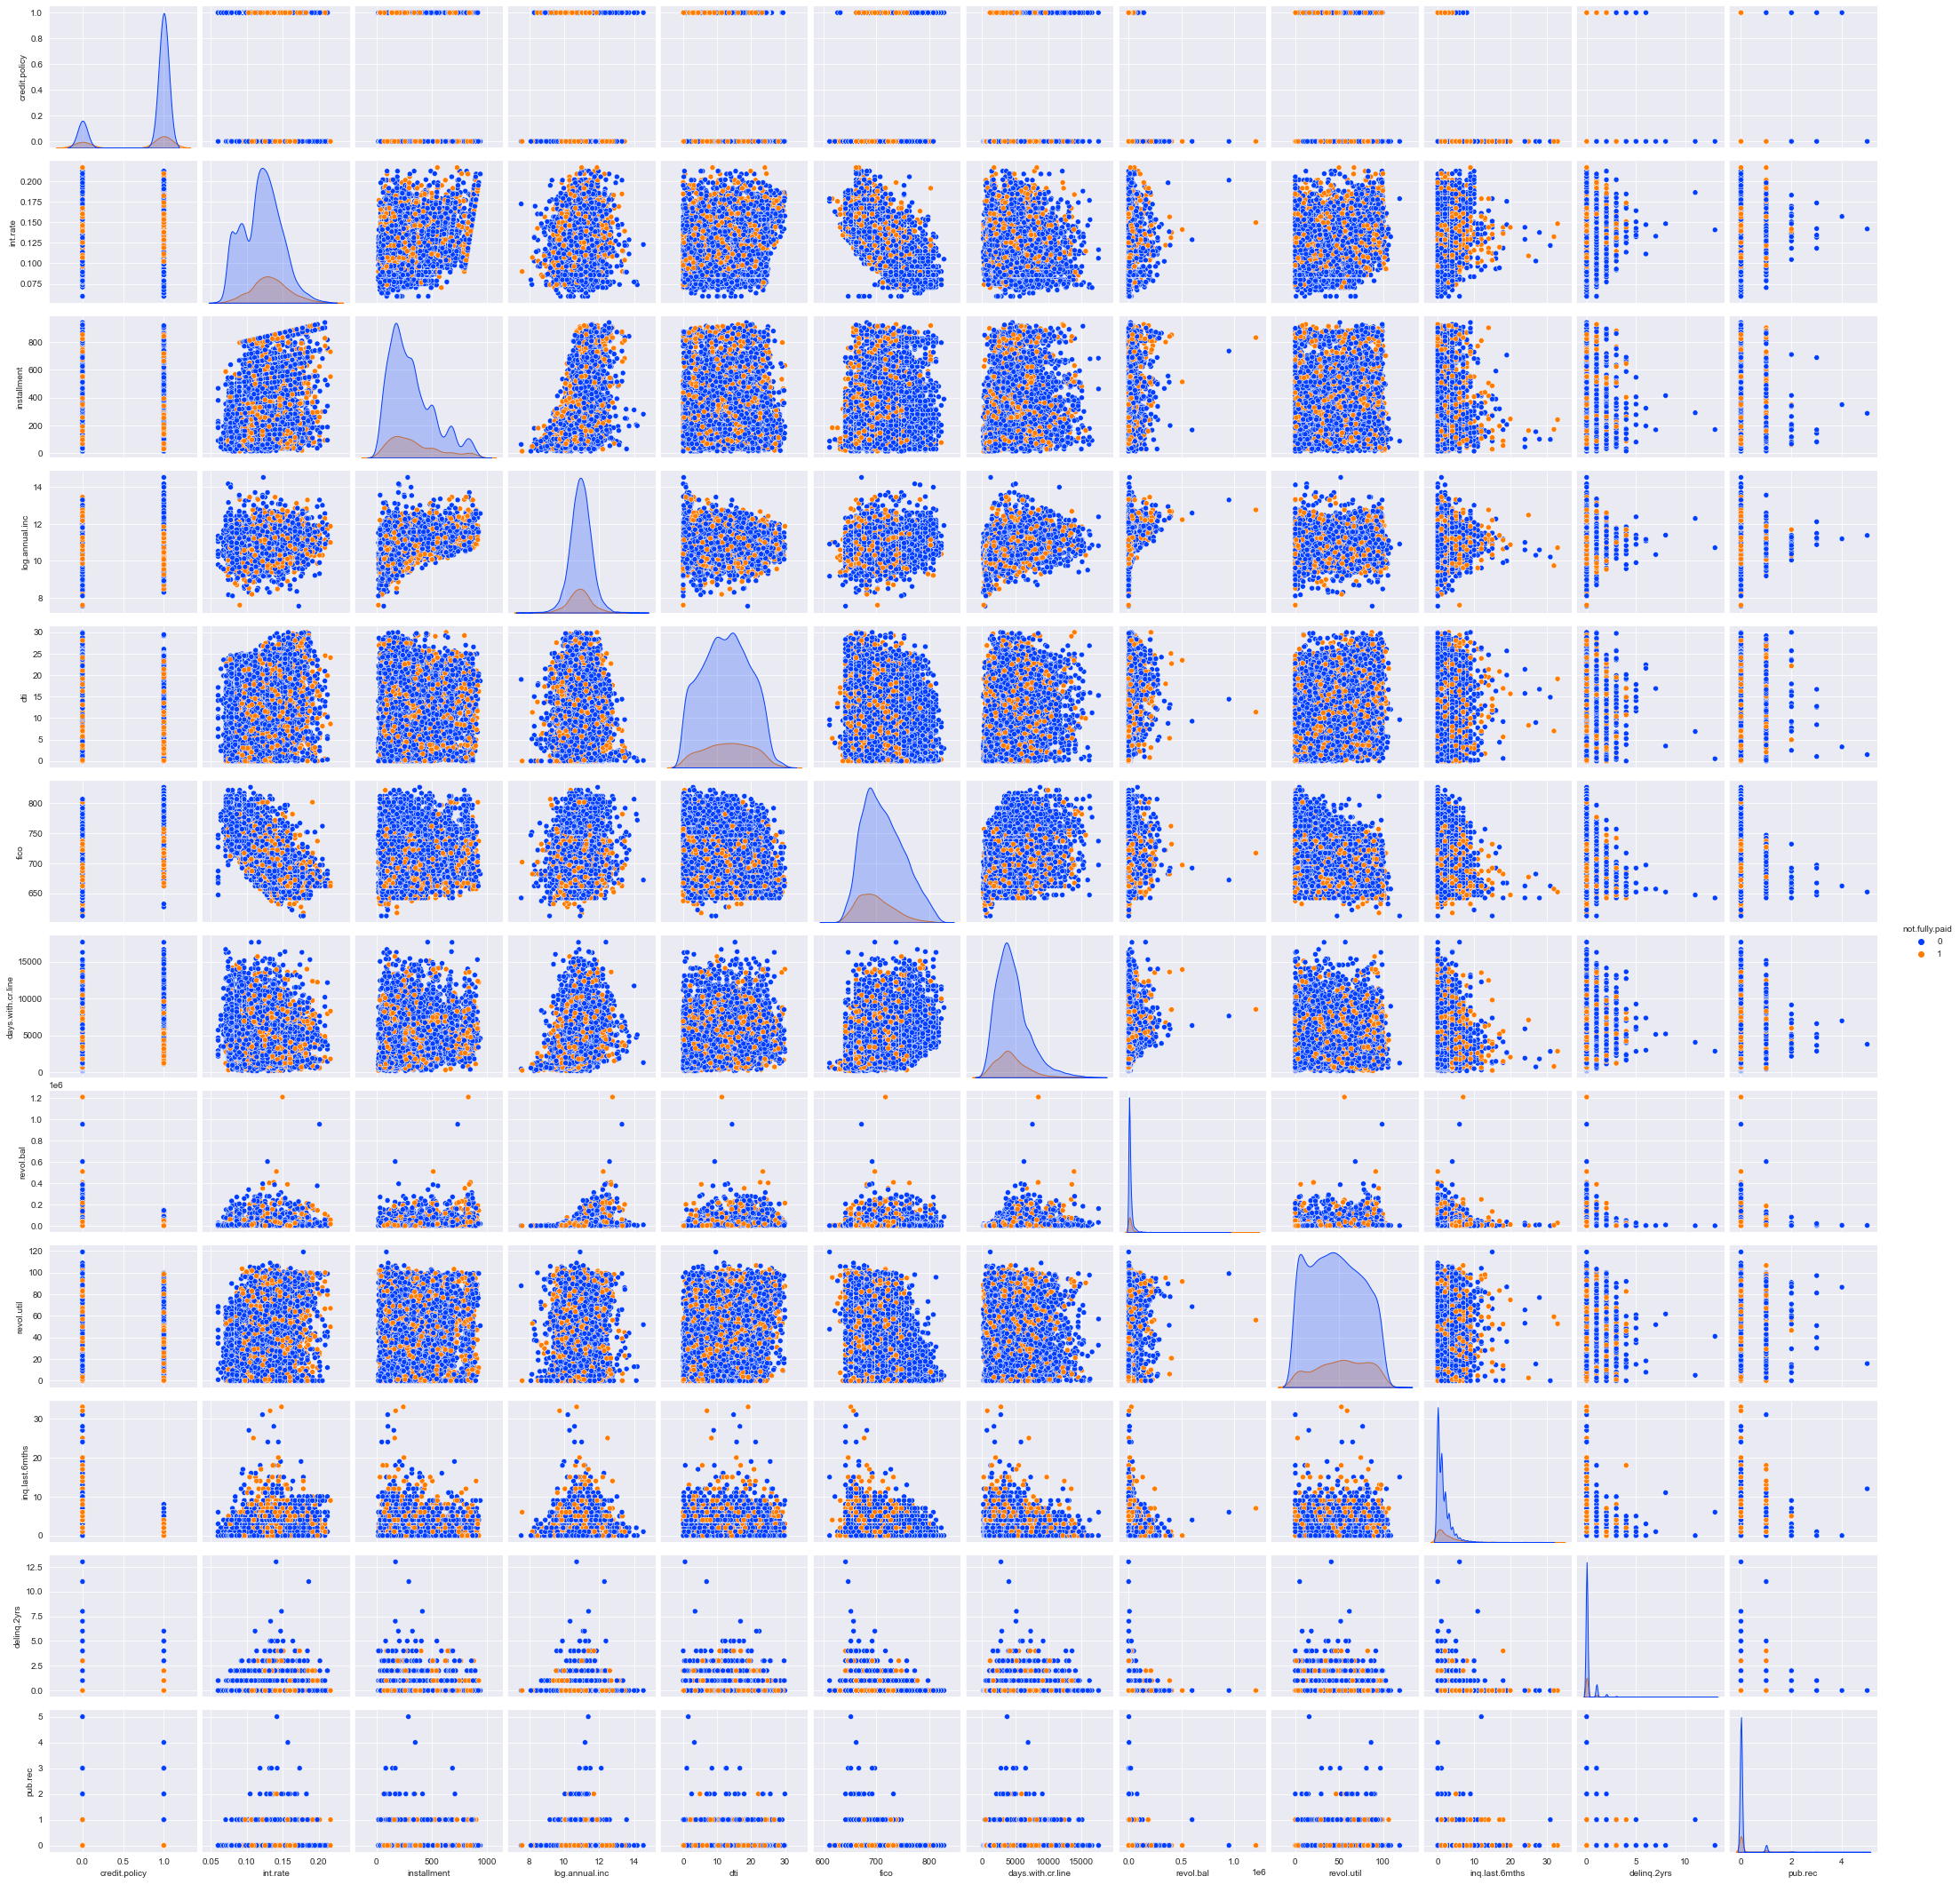

In [14]:
#Pairplot between features
sns.pairplot(df,hue='not.fully.paid',palette="bright")

In [15]:
# Creating a set of dummy variables from the purpose variable
df_purpose = pd.get_dummies(df['purpose'])
df_new = df.copy()
df_new = pd.concat([df, df_purpose], axis=1)
df_new.drop('purpose', axis=1,inplace = True)
df_new.head()

#Find correlation between features and plot heatmap for all the numerical values.
#lets plot heatmap using spearman correlation

spearman_corr= df_new.corr('spearman')
print(spearman_corr)

                    credit.policy  int.rate  installment  log.annual.inc  \
credit.policy            1.000000 -0.287878     0.073698        0.029398   
int.rate                -0.287878  1.000000     0.242914        0.041648   
installment              0.073698  0.242914     1.000000        0.431405   
log.annual.inc           0.029398  0.041648     0.431405        1.000000   
dti                     -0.080286  0.216114     0.062547       -0.059672   
fico                     0.352399 -0.744986     0.085257        0.107878   
days.with.cr.line        0.112885 -0.133584     0.201920        0.400251   
revol.bal               -0.009222  0.148719     0.351844        0.415817   
revol.util              -0.102636  0.472965     0.096013        0.053172   
inq.last.6mths          -0.433860  0.174137    -0.006740        0.030574   
delinq.2yrs             -0.057772  0.172677    -0.007541        0.029732   
pub.rec                 -0.048692  0.093887    -0.027854        0.013282   
not.fully.pa

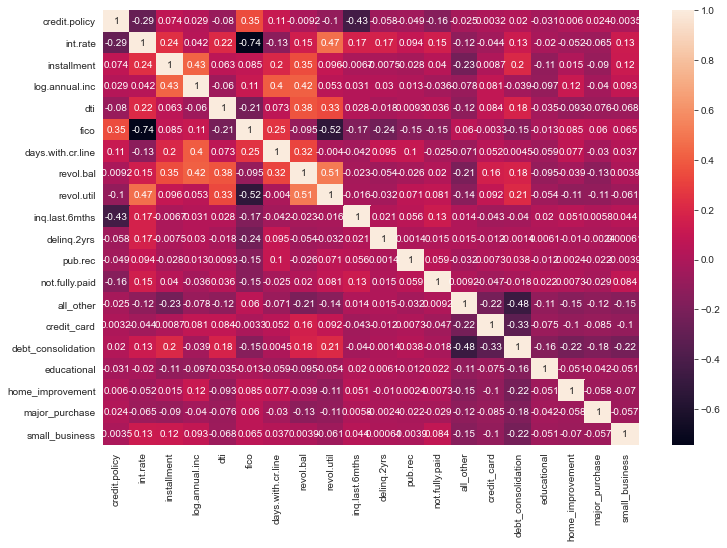

In [16]:
sns.heatmap(spearman_corr, annot=True)
plt.show()

In [17]:
#Find correlation between features and plot heatmap for all the numerical values.
spearman_corr= df_new.corr('spearman')
print(spearman_corr)

#Flatten the corr matrix
df1 = spearman_corr.stack().reset_index()
df1.columns = ['FEATURE_1','FEATURE_2','corr']
# create a mask to identify rows with duplicate features as mentioned above
mask_dups = (df1[['FEATURE_1', 'FEATURE_2']].apply(frozenset, axis=1).duplicated()) | (df1['FEATURE_1']==df1['FEATURE_2']) 

# apply the mask to clean the correlation dataframe
df1 = df1[~mask_dups]
print(df1)


                    credit.policy  int.rate  installment  log.annual.inc  \
credit.policy            1.000000 -0.287878     0.073698        0.029398   
int.rate                -0.287878  1.000000     0.242914        0.041648   
installment              0.073698  0.242914     1.000000        0.431405   
log.annual.inc           0.029398  0.041648     0.431405        1.000000   
dti                     -0.080286  0.216114     0.062547       -0.059672   
fico                     0.352399 -0.744986     0.085257        0.107878   
days.with.cr.line        0.112885 -0.133584     0.201920        0.400251   
revol.bal               -0.009222  0.148719     0.351844        0.415817   
revol.util              -0.102636  0.472965     0.096013        0.053172   
inq.last.6mths          -0.433860  0.174137    -0.006740        0.030574   
delinq.2yrs             -0.057772  0.172677    -0.007541        0.029732   
pub.rec                 -0.048692  0.093887    -0.027854        0.013282   
not.fully.pa

In [18]:
#print those with corr
print(df1[df1['corr'] >= 0.3])

             FEATURE_1          FEATURE_2      corr
5        credit.policy               fico  0.352399
28            int.rate         revol.util  0.472965
43         installment     log.annual.inc  0.431405
47         installment          revol.bal  0.351844
66      log.annual.inc  days.with.cr.line  0.400251
67      log.annual.inc          revol.bal  0.415817
87                 dti          revol.bal  0.375950
88                 dti         revol.util  0.333655
127  days.with.cr.line          revol.bal  0.323954
148          revol.bal         revol.util  0.514898


In [19]:
#Determine the golden feature set by taking strong relationship between dependent and independent variable from the figured correlation.
spearman_corr_joined = df_new.corr('spearman')['not.fully.paid']
golden_feature_list_spearman = spearman_corr_joined[abs(spearman_corr_joined) >= 0.1].sort_values(ascending=False)
print(golden_feature_list_spearman)

not.fully.paid    1.000000
int.rate          0.152725
inq.last.6mths    0.131478
fico             -0.147920
credit.policy    -0.158119
Name: not.fully.paid, dtype: float64


No significant dependency with target variable

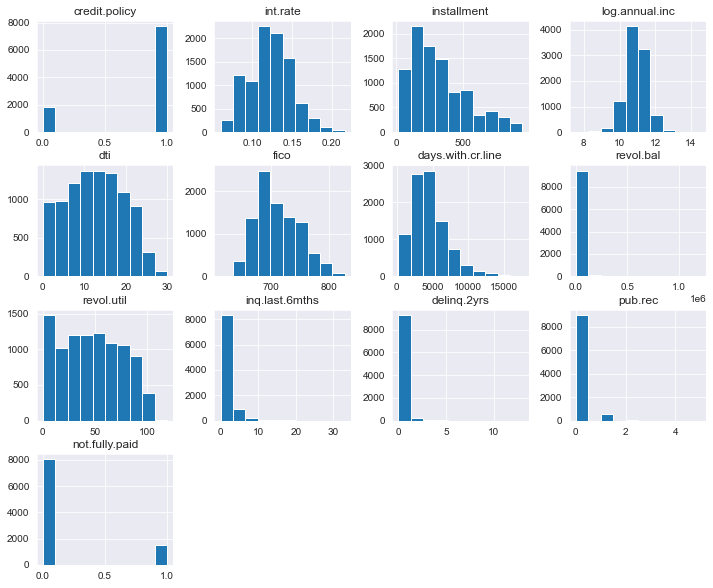

In [20]:
#plot histogram for attributes of type number(float and int)
df.select_dtypes(include='number').hist(figsize=(12,10))
plt.show()

data looks well distributed

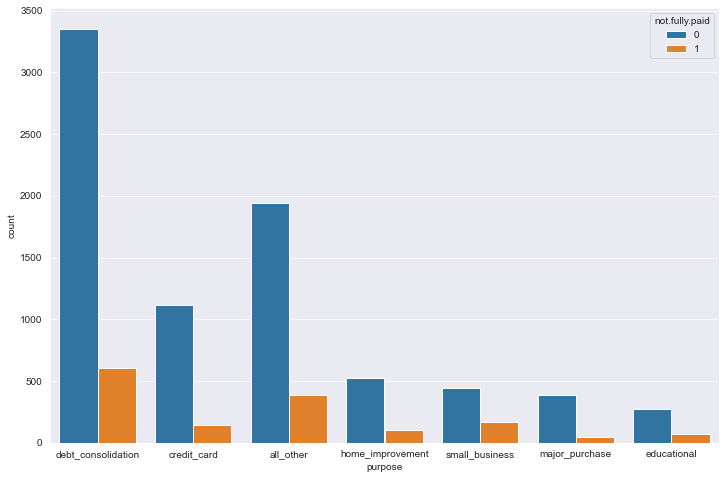

In [21]:
ax = sns.countplot(x="purpose", hue="not.fully.paid", data=df)

From above graph, those whose purpose was debt_consolidation, all_other,small business, credit_card show some good numbers among people not fully paid loan.

## 3.	Split the Data
•	Divide into features and target (0.5 M)
•	Divide into training and testing (0.5 M)
•	Ensure that data is divided with a more or less equal ratio of class 1 and 0 in both test and train set (0.5 M)


In [22]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [23]:
#Split features and target
X = df_new.drop(columns="not.fully.paid")
y = df_new['not.fully.paid']

In [24]:
# Do the test and train data split using stratify sampling to divide data into equal ratio of class 1 and 0 in both test and train set.
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,stratify = y, test_size=0.4)

## 4.	Implement the SVM Model
•	Scale the features (1 M)
•	Train Model (1 M)
•	Predict (1 M)

In [48]:
#Scale the features
from sklearn.preprocessing import PowerTransformer, StandardScaler

In [49]:
colnames = df_new.select_dtypes(include= 'number').columns.tolist()

features = df_new[colnames]
scaler = StandardScaler()
df_scaled = df_new.copy()
df_scaled[colnames] = scaler.fit_transform(features.values)

In [50]:
#Split features and target
X = df_scaled.drop(columns="not.fully.paid")
y = df_scaled['not.fully.paid']

In [51]:
# Do the test and train data split using stratify sampling to divide data into equal ratio of class 1 and 0 in both test and train set.
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,stratify = y, test_size=0.4)\

#y_train = y_train.values.reshape((-1, 1)) 
#y_test = y_test.values.reshape((-1, 1)) 


   log.annual.inc       dti
0        0.680388  0.998505
1        0.244031  0.244540
2       -0.908659 -0.141885
3        0.680388 -0.654697
4        0.597961  0.343326


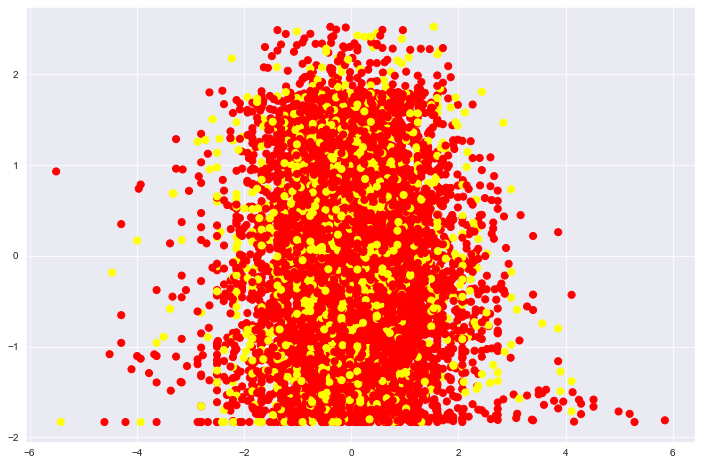

In [45]:
#plot sample scatter plot for 2 features to see if target variable is linearly separable
#df_number = df.select_dtypes(include = 'number')
#for col in df_number:
x_tmp=df_scaled.iloc[:,3:5]
print(x_tmp.head())
y_tmp=df_scaled['not.fully.paid']
plt.scatter(x_tmp.iloc[:,0],x_tmp.iloc[:,1],c=y_tmp,s=50, cmap='autumn')

clearly target variable does not look linearly separable. Must use polynomial of radial kernel methods for classification.

In [30]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)
y_test = lab_enc.fit_transform(y_test)

In [31]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [32]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8400313152400835
Precision: 0.0
Recall: 0.0


## 5.	Measure Accuracy
•	Classification Report (0.5)

In [35]:
 print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3219
           1       0.00      0.00      0.00       613

    accuracy                           0.84      3832
   macro avg       0.42      0.50      0.46      3832
weighted avg       0.71      0.84      0.77      3832



In [36]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf') #rbf kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)



In [37]:
 print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3219
           1       0.50      0.00      0.00       613

    accuracy                           0.84      3832
   macro avg       0.67      0.50      0.46      3832
weighted avg       0.79      0.84      0.77      3832



In [38]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='poly') # Polynomial kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [39]:
 print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3219
           1       0.42      0.04      0.07       613

    accuracy                           0.84      3832
   macro avg       0.63      0.51      0.49      3832
weighted avg       0.78      0.84      0.78      3832



In [40]:
#find optimal C and gamma values using gridSearch
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=19, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [41]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

Wall time: 2min 31s
{'svc__C': 1, 'svc__gamma': 0.0001}


In [42]:
model = grid.best_estimator_
yfit = model.predict(X_test)

In [43]:
 print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3219
           1       0.42      0.04      0.07       613

    accuracy                           0.84      3832
   macro avg       0.63      0.51      0.49      3832
weighted avg       0.78      0.84      0.78      3832



Thus Polynomial/rbf gives better accuracy of 84% comparing the classification reports.